In [1]:
library(lme4)
library(afex)
library(emmeans)
library(dplyr)
library(ggplot2)
library(svglite)
library(lmtest)
library(tidyr)
library(MCMCglmm)
library(reshape)
library(gridExtra)
library(cowplot)
library(plotrix)
library(ggsignif)

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘tidyr’


The following objects 

In [2]:
ITI <- read.csv('/home/bagotlab/eshaan.i/PRL/FP_PRL_Nov_2021/Code/Longform Data/PRLInformationMeasures_ZScore_ITI.csv')

ITI = subset(ITI, (lp > 0) & (ID!=223))
ITI<-ITI %>% drop_na()
ITI$time_idx <- as.factor(as.numeric(as.factor(ITI$time)))
ITI<-ITI[,c('index','time_idx','time','ID','rewards','lp','Day','rt','PFC','vHIP','MutualInfo','CE_PFCvHIP','CE_vHIPPFC','MutualInfo_PC','CE_PFCvHIP_PC','CE_vHIPPFC_PC','MutualInfo_EI','CE_PFCvHIP_EI','CE_vHIPPFC_EI')]
ITI<- ITI %>% group_by(ID,Day) %>% mutate(Previous.Reward = lag(rewards,n=240))
ITI<- ITI %>% group_by(ID,Day) %>% mutate(Previous.Previous.Reward = lag(Previous.Reward,n=240))
ITI<- ITI %>% group_by(ID,Day) %>% mutate(Next.Choice = lead(lp,n=240))
ITI<- ITI %>% group_by(ID,Day) %>% mutate(Next.RT = lead(rt,n=240))
ITI<- ITI %>% group_by(ID,Day) %>% mutate(Previous.Choice = lag(lp,n=240))
ITI = subset(ITI, time >= 0)

ccfdf = ITI %>% group_by(index) %>% summarize(MaxDelay = (which.max(ccf(PFC,vHIP, 100,plot=FALSE)$acf)-101)/20,rewards=mean(rewards),ID=mean(ID),Previous.Reward=mean(Previous.Reward), Day=mean(Day))
ccfdf$sex <- as.factor(ifelse(ccfdf$ID > 212,"Female", "Male"))
ccfdf$rewards<-as.factor(ccfdf$rewards)
ccfdf$ID<-as.factor(ccfdf$ID)
ccfdf$Day<-as.factor(ccfdf$Day)


In [44]:
plot_theme <- theme(axis.title=element_text(size=25,color='gray30'),
                    axis.line=element_line(color='gray30'),
                    axis.text.y=element_text(size=20,color='gray30'),
                    axis.text.x=element_text(size=20,color='gray30'),
                    legend.text=element_text(size=20),
                    legend.key.size=unit(2,'mm'),
                    panel.background=element_blank(),
                    panel.grid.major.y = element_blank(),
                    legend.position = 'none',
                    plot.margin = margin(0.5,0.5,0.5,0.5,'cm'),
                    strip.background = element_blank(),
                    strip.text = element_text(size=20,color='gray30')) 

plot_theme <- list(plot_theme, 
                        scale_color_manual(values=c('PFC'="#B51D1D",  'vHIP'="#F27E19")),
                        scale_fill_manual(values=c('PFC'="#B51D1D",  'vHIP'="#F27E19")),
                        scale_shape_manual(values=c('Male'=16,'Female'=17)))

In [ ]:
#Figure A

test <- lmer(MaxDelay~sex-1+(1|ID)+(1|Day), data=ccfdf)
summary(test)


In [ ]:
#Figure B

test <- lmer(MaxDelay~rewards:sex-1+(1|ID)+(1|Day), data=ccfdf)
summary(test)


In [37]:
DF <- as.data.frame(ITI[((ITI$time)>=0),] %>% group_by(index)%>%summarize(PFC=time[which.min(PFC)],vHIP=time[which.min(vHIP)],rewards=mean(rewards),ID=mean(ID),Day=as.factor(mean(Day))))
DF<-melt(DF, id=c('index','rewards', 'ID', 'Day'))
DF$sex <- as.factor(ifelse(DF$ID > 212,"Female", "Male"))
DF$ID <- as.factor(DF$ID)

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'pbkrtest.limit = 27152' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 27152)' or larger];
but be warned that this may result in large computation time and memory use.

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 27152' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 27152)' or larger];
but be warned that this may result in large computation time and memory use.

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons

Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



,contrast,sex,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PFC - vHIP,Female,0.4752849,0.04808688,Inf,9.883878,0
2,PFC - vHIP,Male,0.5135935,0.04836396,Inf,10.619344,0
,contrast,variable,estimate,SE,df,z.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Female - Male,PFC,0.08191212,0.1822719,Inf,0.4493953,0.8796927
2,Female - Male,vHIP,0.12022076,0.1822719,Inf,0.6595684,0.7594400


sex = Female:
 variable emmean    SE  df asymp.LCL asymp.UCL
 PFC        5.71 0.139 Inf      5.44      5.98
 vHIP       5.24 0.139 Inf      4.96      5.51

sex = Male:
 variable emmean    SE  df asymp.LCL asymp.UCL
 PFC        5.63 0.134 Inf      5.37      5.89
 vHIP       5.12 0.134 Inf      4.85      5.38

Degrees-of-freedom method: asymptotic 
Confidence level used: 0.95 

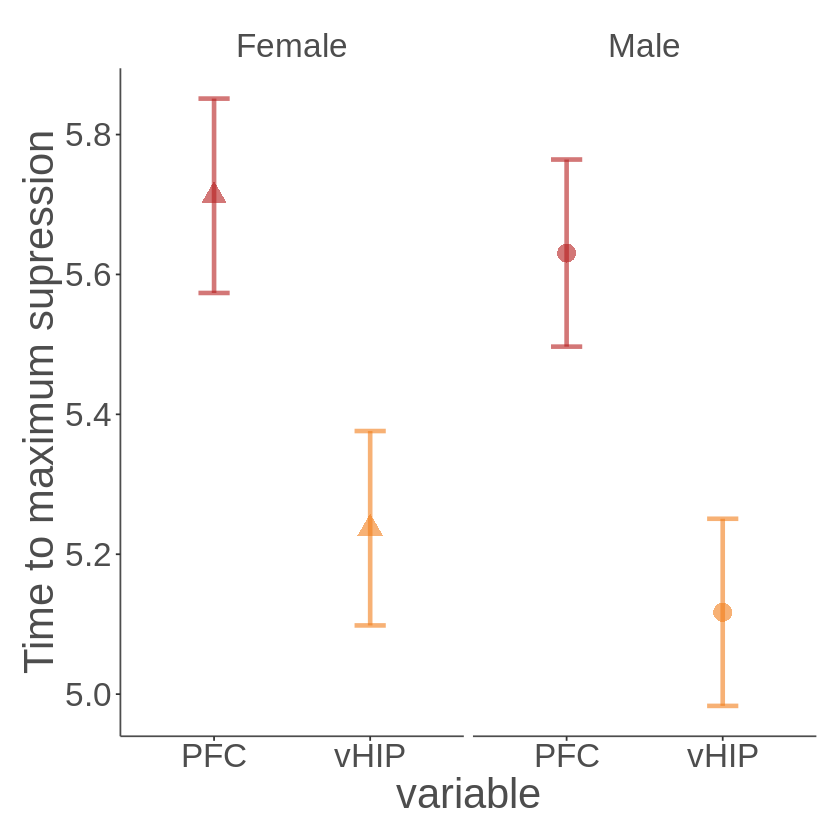

In [ ]:
#Figure C

test = lmer(value~variable*sex+(1|ID)+(1|Day), data=subset(DF, rewards==1))
test_means <- emmeans(test, ~ variable|sex)

dtf <- test_means
simp <- pairs(dtf, simple = "each")
test(simp, by = NULL)
dtf

ggplot(data.frame(dtf)) +
  geom_point( aes(x=variable, y=emmean, color=variable, shape=sex), stat="identity", size = 5, alpha=0.6) +
  geom_errorbar( aes(x=variable, ymin=emmean-SE, ymax=emmean+SE,color=variable), width=0.2, alpha=0.6, size=1.3) +
  ylab('Time to maximum supression')+
  plot_theme + 
  facet_grid(~sex)